In [384]:
import numpy as np
import matplotlib.pyplot as plt

In [385]:
ds = np.genfromtxt('./artificial1d.csv', delimiter=',')

In [386]:
_x = ds[:, 0]
_y = ds[:, 1]
ones = np.ones(_x.shape[0])
x = np.column_stack((ones, _x[:,]))
y = _y.reshape(_y.shape[0], 1)

In [432]:
def regressao_linear(X, W):
    return X@W.T

def OLS(X, Y):
    return ((np.linalg.inv(X.T @ X) @ X.T) @ Y).T

def RMSE(Y, _Y):
    return np.sqrt(((Y -_Y) ** 2).mean())

def GradienteDescedente(epochs=5000, learning_rate=0.1):

    errors = []
    initial_weight = np.zeros((1, 2))
    weight = initial_weight
    for _ in range(epochs):
        prediction = regressao_linear(x, weight)
        error = y - prediction
        gradientes = np.mean(error * x, axis=0, keepdims=True)
        weight += (learning_rate * gradientes)

        epoch_error = RMSE(y, prediction)
        errors.append(epoch_error)

    return weight, errors

def GradienteDescedenteStocastico(epochs=5000, learning_rate=0.001):

    errors = []
    initial_weight = np.zeros((1, 2))
    weight = initial_weight
    for _ in range(epochs):

        shuffle = np.random.permutation(x.shape[0])
        x1 = x[shuffle]
        y1 = y[shuffle]

        for i in range(x1.shape[0]):
            prediction = regressao_linear(x1[i], weight)
            error = y1[i] - prediction
            gradientes = (x1[i] * error)
            weight = weight + (learning_rate * gradientes)

        prediction = regressao_linear(x, weight)
        errors.append(RMSE(y, prediction))
    return weight, errors

(array([[0.0674629 , 1.57486049]]),
 [1.0405559610597221,
  1.031596378725267,
  1.0227534876585325,
  1.0140256668213792,
  1.0054168873718214,
  0.9969215423751032,
  0.9885372373617246,
  0.9802710629860859,
  0.9721152195092514,
  0.9640599757288644,
  0.9561192157089795,
  0.9482841200056394,
  0.9405489243804989,
  0.9329300563309588,
  0.9254070338897636,
  0.9179844465020646,
  0.9106691962054477,
  0.9034506787464841,
  0.8963288690926974,
  0.8893092863357881,
  0.8823829058809598,
  0.8755497828022935,
  0.8688141769226615,
  0.8621689198329047,
  0.8556110326005557,
  0.8491491595764131,
  0.8427705209900698,
  0.8364858440719072,
  0.830290459516153,
  0.8241834517690382,
  0.8181580481901406,
  0.8122255263751349,
  0.8063721138508456,
  0.8006031784538946,
  0.7949209498384067,
  0.789315167491824,
  0.7837890836242545,
  0.778342227091905,
  0.7729704351684606,
  0.7676851179039978,
  0.7624766166647375,
  0.7573394819343671,
  0.7522825157859288,
  0.7473008804431802,


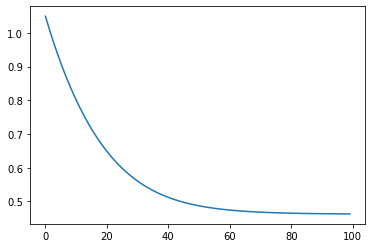

In [480]:
weight, errors = GradienteDescedente(100, 0.1)
plt.plot(errors)
plt.show()

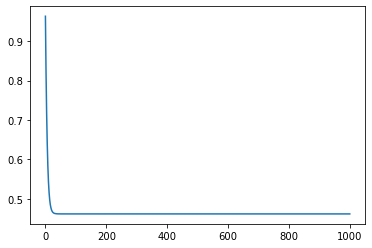

In [489]:
weightEst, errors = GradienteDescedenteStocastico(1000, 0.01)
plt.plot(errors)
plt.show()

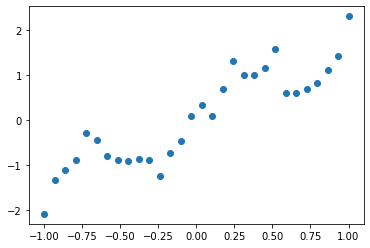

In [482]:
plt.scatter(_x, y)
plt.show()

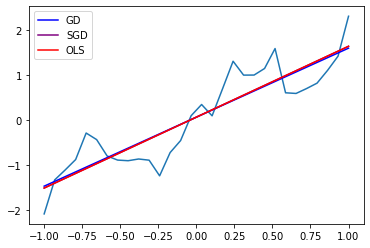

In [483]:
plt.plot(_x, y)
plt.plot(_x, regressao_linear(x, weight), color="blue", label="GD")
plt.plot(_x, regressao_linear(x, weightEst), color="purple", label="SGD")
plt.plot(_x, regressao_linear(x, OLS(x, y)), color="red", label="OLS")
plt.legend()
plt.show()

In [484]:
weight

array([[0.06761613, 1.53303263]])

In [485]:
weightEst

array([[0.06761614, 1.57475375]])

In [486]:
OLS(x, y)

array([[0.06761792, 1.57486517]])